The Iris flower data set, also known as Fisher's Iris data set, was introduced by Ronald Fisher, a British statistician, eugenicist, and biologist, in his 1936 paper titled "The use of multiple measurements in taxonomic problems" as an illustration of linear discriminant analysis. Although it is occasionally referred to as Anderson's Iris data set, as Edgar Anderson collected the data, the purpose was to quantify the morphological variation among Iris flowers of three closely related species. Notably, two of the three species were gathered in the Gaspé Peninsula, all under uniform conditions. Fisher's publication in the Annals of Eugenics sparked controversy regarding the continued use of the Iris dataset for teaching statistical techniques in contemporary settings.

The dataset comprises 50 samples from each of three Iris species: Iris setosa, Iris virginica, and Iris versicolor. Four distinct features were measured for each sample, namely the length and width of both sepals and petals, all recorded in centimeters. Fisher utilized the combination of these four features to develop a linear discriminant model capable of distinguishing between the different Iris species.

import libraries

In [14]:
import numpy as np
import pandas

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import seaborn as sns 
import matplotlib.pyplot as plt

reading IRIS dataset

In [16]:
iris = pandas.read_csv("IRIS.csv")
x = iris.iloc[:,[0,1,2,3]].values

In [17]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [18]:
iris_outcome = pandas.crosstab(index=iris["species"], columns="count")
iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [19]:
iris_setosa = iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica= iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

distribution plots

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func

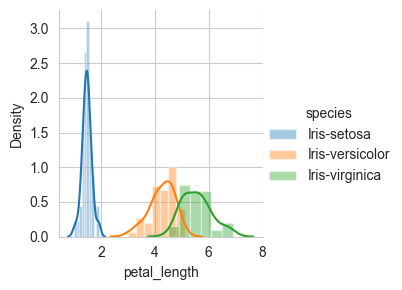

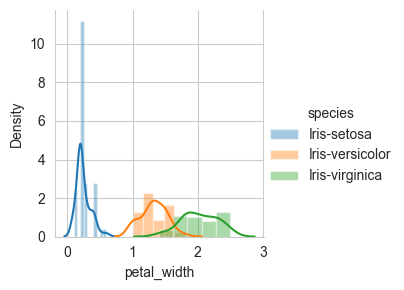

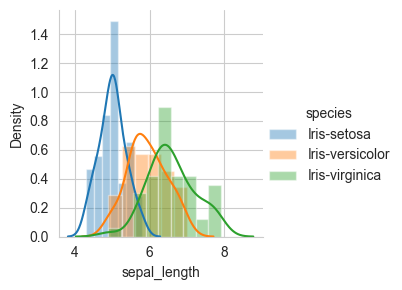

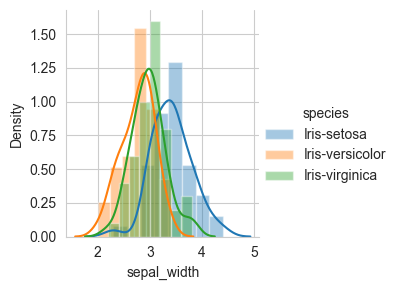

In [27]:
sns.FacetGrid(iris, hue="species").map(sns.distplot, "petal_length").add_legend() 
sns.FacetGrid(iris, hue="species").map(sns.distplot, "petal_width").add_legend() 
sns.FacetGrid(iris, hue="species").map(sns.distplot, "sepal_length").add_legend() 
sns.FacetGrid(iris, hue="species").map(sns.distplot, "sepal_width").add_legend()
plt.show()

c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


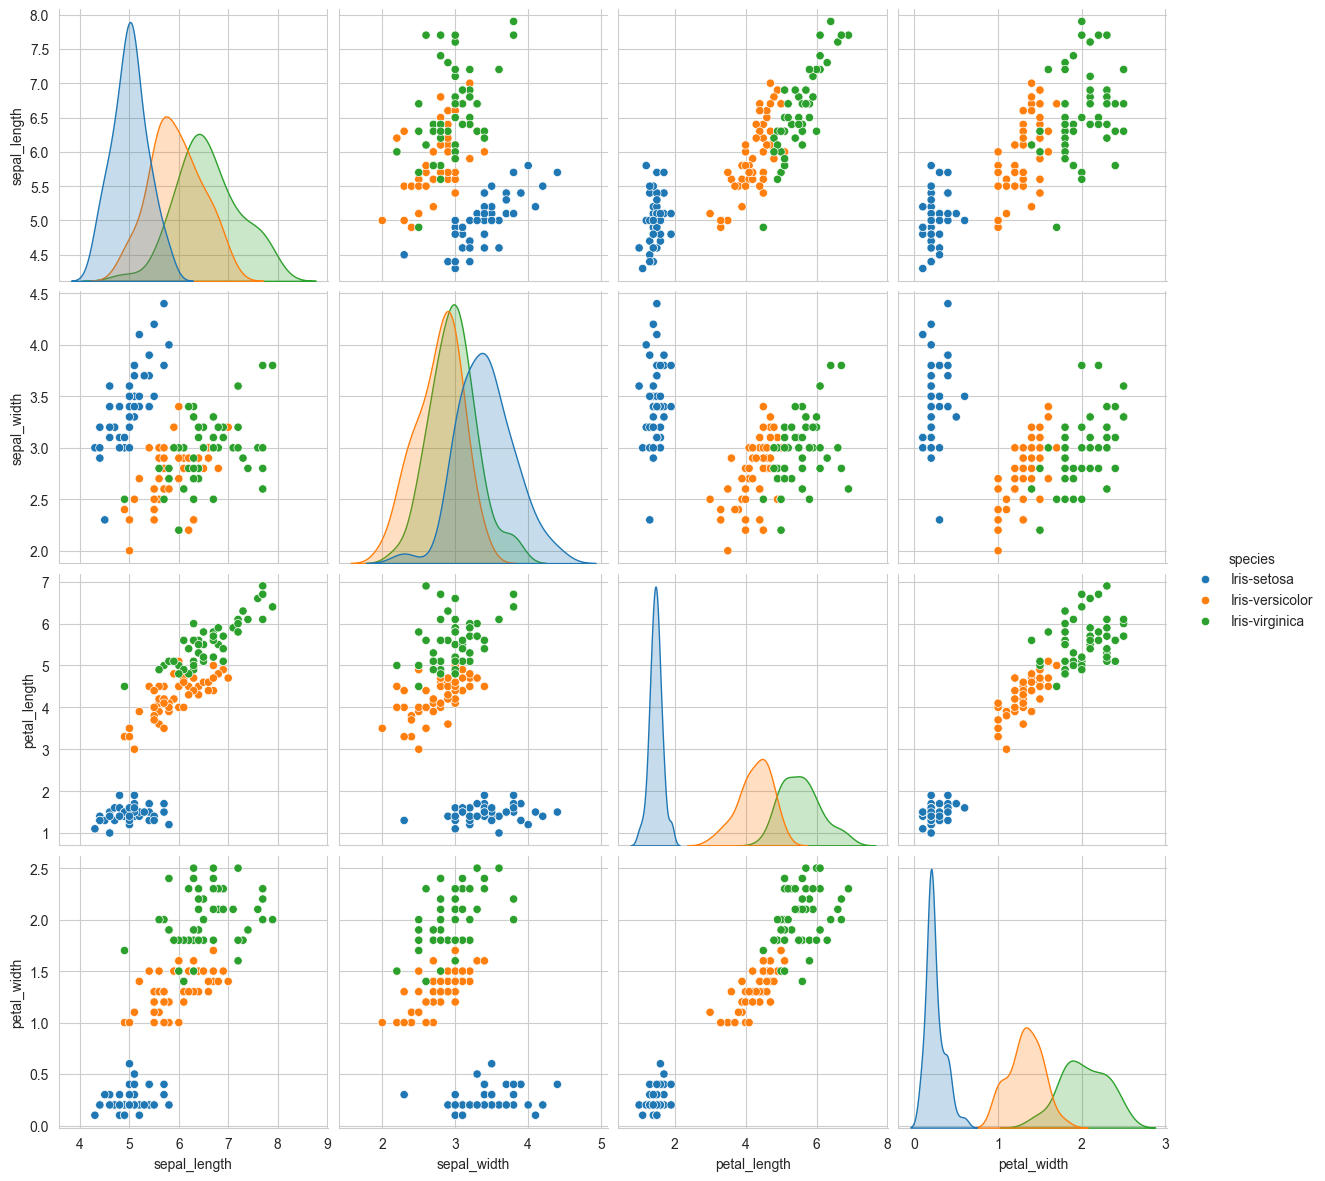

In [28]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3)
plt.show()

K MEANS CLUSTERING

In [29]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters =i, init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

elbow method

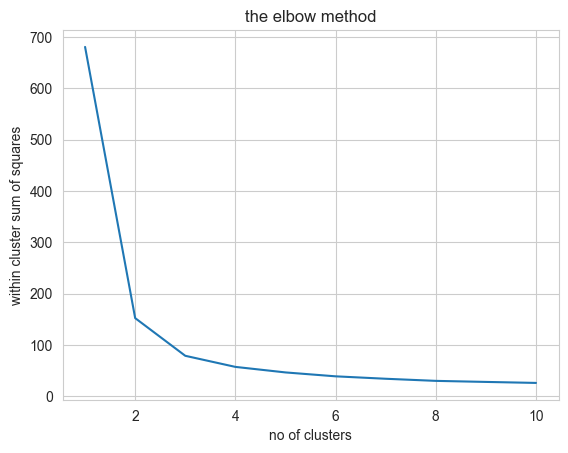

In [30]:
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('no of clusters')
plt.ylabel('within cluster sum of squares')
plt.show()

implementing K MEANS CLUSTERING

In [31]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

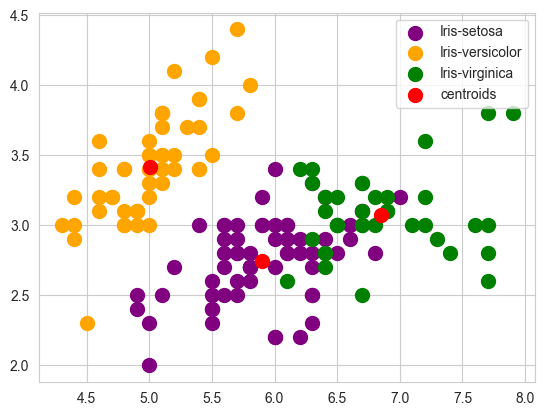

In [32]:
#visualizing and plotting the clusters

plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='purple', label='Iris-setosa') 
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='orange', label='Iris-versicolor') 
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label='centroids')
plt.legend()

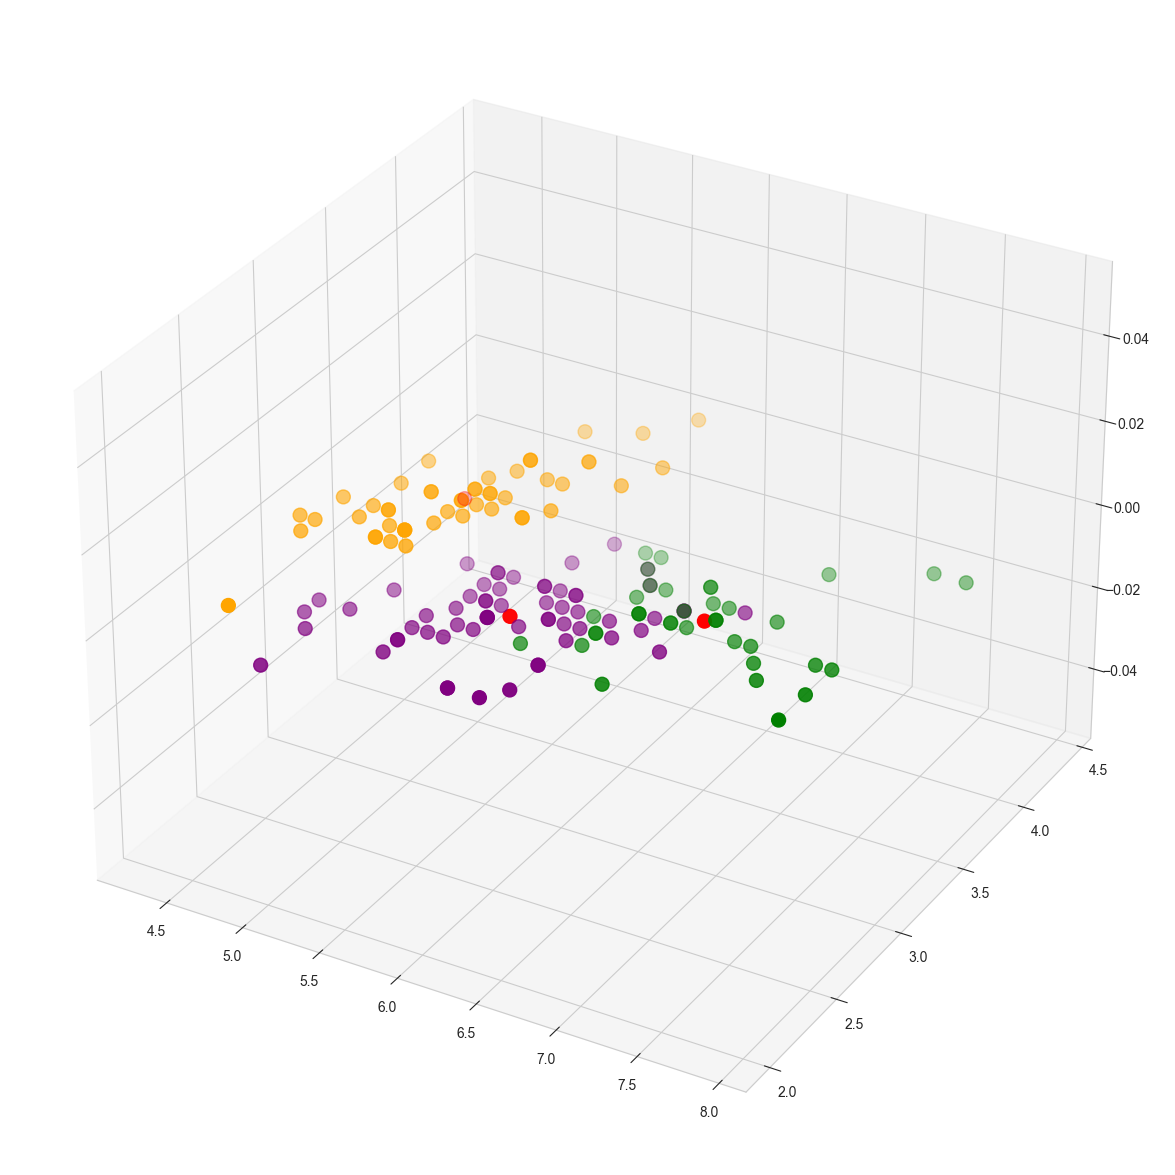

In [33]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='purple', label='Iris-setosa') 
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='orange', label='Iris-versicolor') 
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red', label='centroids')
plt.show()
